In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from multihist import Histdd

import flamedisx as fd

import os

2025-04-02 21:01:03.487902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743652863.503005 1175010 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743652863.507612 1175010 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743652863.521786 1175010 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743652863.521798 1175010 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743652863.521799 1175010 computation_placer.cc:177] computation placer alr

In [2]:
pdfs = [dict(), dict()]

## ROI for templates

In [3]:
xlzd_source = fd.xlzd.XLZDERSource(configuration='60t')

cS1_min = xlzd_source.cS1_min
cS1_max = xlzd_source.cS1_max
log10_cS2_min = xlzd_source.log10_cS2_min
log10_cS2_max = xlzd_source.log10_cS2_max

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


## Detector parameters

In [4]:
drift_field_V_cm = 80.
gas_field_kV_cm = 7.5
elife_ns = 10000e3
g1 = 0.31

## Background sources

In [5]:
SolarER = fd.xlzd.XLZDvERSource(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


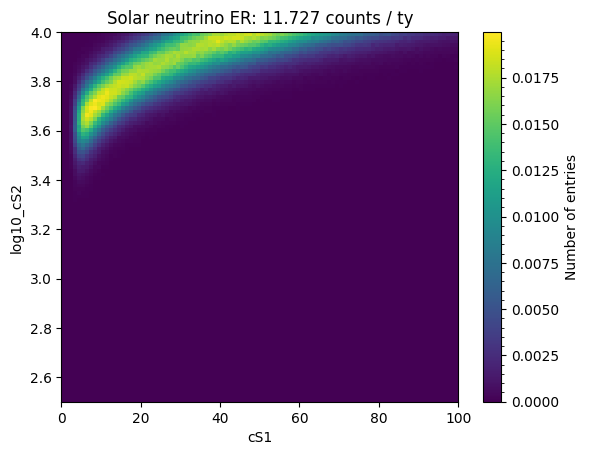

In [6]:
SolarER_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

SolarER_data = SolarER.simulate(int(1e7))

SolarER_hist.add(SolarER_data['cs1'], np.log10(SolarER_data['cs2']))

SolarER_mu = SolarER.estimate_mu(n_trials=int(1e7))
SolarER_hist.histogram = SolarER_hist.histogram / SolarER_hist.n * SolarER_mu

SolarER_hist.plot()
plt.title(f'Solar neutrino ER: {SolarER_mu:.3f} counts / ty')

pdfs[0]['SolarER'] = SolarER_hist

In [7]:
Pb214 = fd.xlzd.XLZDPb214Source(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


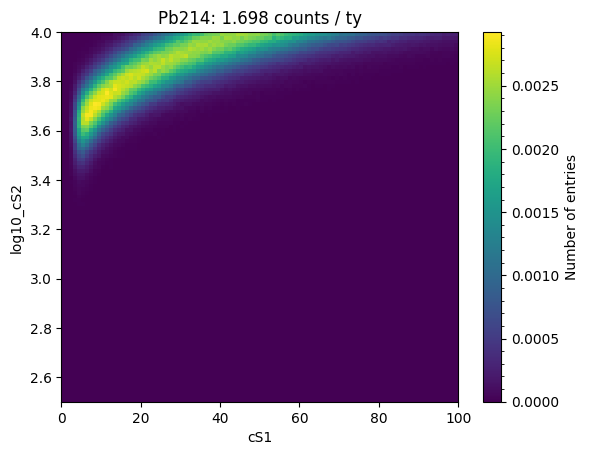

In [8]:
Pb214_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Pb214_data = Pb214.simulate(int(1e7))

Pb214_hist.add(Pb214_data['cs1'], np.log10(Pb214_data['cs2']))

Pb214_mu = Pb214.estimate_mu(n_trials=int(1e7))
Pb214_hist.histogram = Pb214_hist.histogram / Pb214_hist.n * Pb214_mu

Pb214_hist.plot()
plt.title(f'Pb214: {Pb214_mu:.3f} counts / ty')

pdfs[0]['Pb214'] = Pb214_hist

In [9]:
Kr85 = fd.xlzd.XLZDKr85Source(configuration='60t',
                              drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                              elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


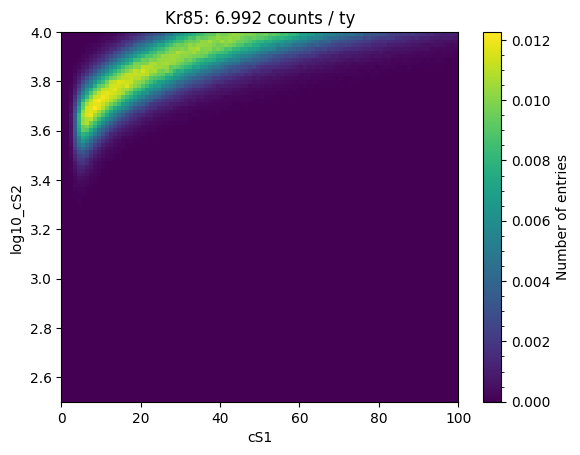

In [10]:
Kr85_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Kr85_data = Kr85.simulate(int(1e7))

Kr85_hist.add(Kr85_data['cs1'], np.log10(Kr85_data['cs2']))

Kr85_mu = Kr85.estimate_mu(n_trials=int(1e7))
Kr85_hist.histogram = Kr85_hist.histogram / Kr85_hist.n * Kr85_mu

Kr85_hist.plot()
plt.title(f'Kr85: {Kr85_mu:.3f} counts / ty')

pdfs[0]['Kr85'] = Kr85_hist

In [11]:
Xe136 = fd.xlzd.XLZDXe136Source(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


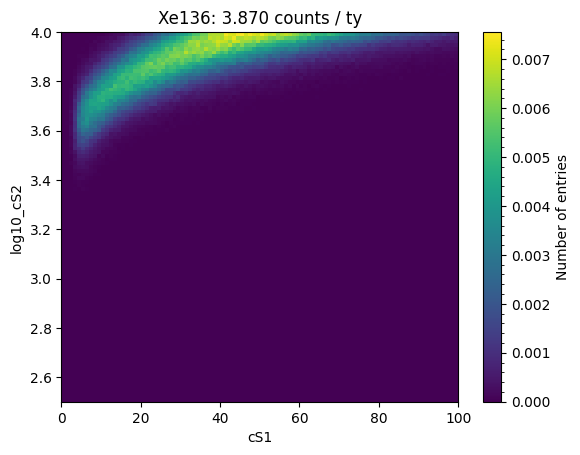

In [12]:
Xe136_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Xe136_data = Xe136.simulate(int(1e7))

Xe136_hist.add(Xe136_data['cs1'], np.log10(Xe136_data['cs2']))

Xe136_mu = Xe136.estimate_mu(n_trials=int(1e7))
Xe136_hist.histogram = Xe136_hist.histogram / Xe136_hist.n * Xe136_mu

Xe136_hist.plot()
plt.title(f'Xe136: {Xe136_mu:.3f} counts / ty')

pdfs[0]['Xe136'] = Xe136_hist

In [13]:
Xe124 = fd.xlzd.XLZDXe124Source(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


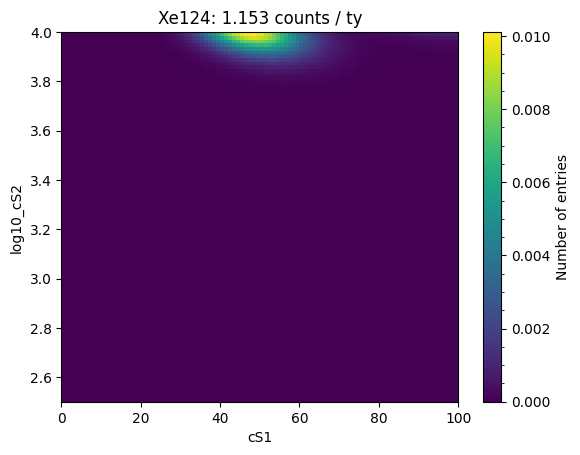

In [14]:
Xe124_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Xe124_data = Xe124.simulate(int(1e7))

Xe124_hist.add(Xe124_data['cs1'], np.log10(Xe124_data['cs2']))

Xe124_mu = Xe124.estimate_mu(n_trials=int(1e7))
Xe124_hist.histogram = Xe124_hist.histogram / Xe124_hist.n * Xe124_mu

Xe124_hist.plot()
plt.title(f'Xe124: {Xe124_mu:.3f} counts / ty')

pdfs[0]['Xe124'] = Xe124_hist

In [15]:
neutrons = fd.xlzd.XLZDWIMPSource(wimp_mass=46,
                                  configuration='60t',
                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                  elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


Text(0.5, 1.0, 'Neutrons')

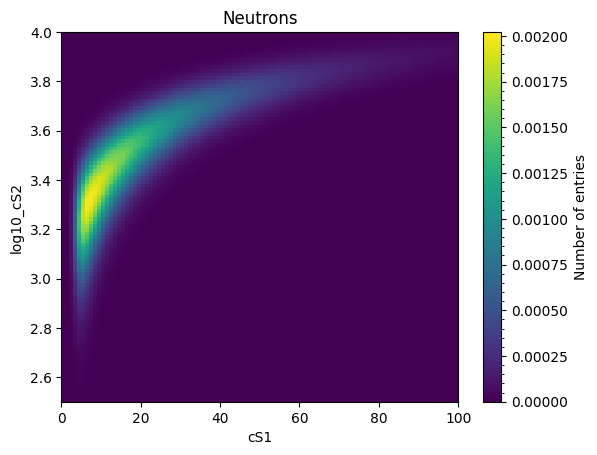

In [16]:
neutrons_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

neutrons_data = neutrons.simulate(int(1e7))

neutrons_hist.add(neutrons_data['cs1'], np.log10(neutrons_data['cs2']))

neutrons_hist.histogram = neutrons_hist.histogram / neutrons_hist.n

neutrons_hist.plot()
plt.title(f'Neutrons')

In [17]:
pdfs[0]['neutrons'] = neutrons_hist * (0.046 / 10.)

In [18]:
CEvNS_other_LNGS = fd.xlzd.XLZDvNROtherLNGSSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


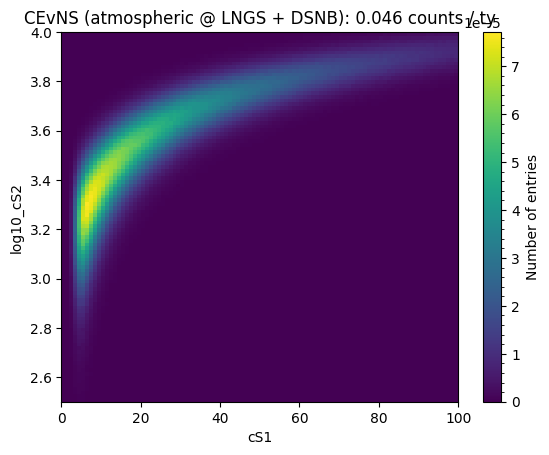

In [19]:
CEvNS_other_LNGS_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_other_LNGS_data = CEvNS_other_LNGS.simulate(int(1e7))

CEvNS_other_LNGS_hist.add(CEvNS_other_LNGS_data['cs1'], np.log10(CEvNS_other_LNGS_data['cs2']))

CEvNS_other_LNGS_mu = CEvNS_other_LNGS.estimate_mu(n_trials=int(1e7))
CEvNS_other_LNGS_hist.histogram = CEvNS_other_LNGS_hist.histogram / CEvNS_other_LNGS_hist.n * CEvNS_other_LNGS_mu

CEvNS_other_LNGS_hist.plot()
plt.title(f'CEvNS (atmospheric @ LNGS + DSNB): {CEvNS_other_LNGS_mu:.3f} counts / ty')

pdfs[0]['CEvNS_other_LNGS'] = CEvNS_other_LNGS_hist

## Signal sources

In [20]:
masses = [9.0, 65.0, 5000.0]

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


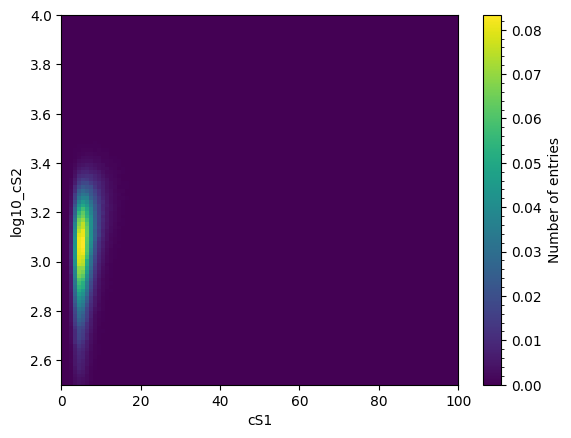

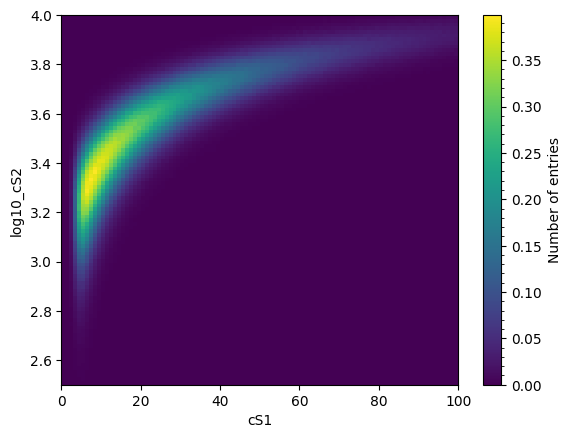

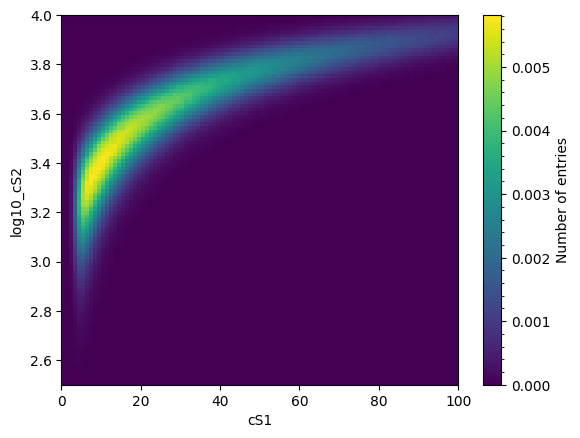

In [21]:
for mass in masses:
    WIMP = fd.xlzd.XLZDWIMPSource(wimp_mass=mass, configuration='60t',
                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                  elife_ns=elife_ns, g1=g1)
    
    WIMP_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

    WIMP_data = WIMP.simulate(int(1e7))

    WIMP_hist.add(WIMP_data['cs1'], np.log10(WIMP_data['cs2']))

    WIMP_mu = WIMP.estimate_mu(n_trials=int(1e7))
    WIMP_hist.histogram = WIMP_hist.histogram / WIMP_hist.n * WIMP_mu

    plt.figure()
    WIMP_hist.plot()

    pdfs[1][f'WIMP{mass:.0f}'] = WIMP_hist

## Save all PDFs

In [22]:
if not os.path.exists('PDFs'):
    os.makedirs('PDFs')

In [23]:
pkl.dump(pdfs, open(f'PDFs/pdfs_WIMP_disco_60t_benchmark.pkl', 'wb'))